In [2]:
#needed Packages
import numpy as np
import scipy
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import tsfresh as ts
import os
import pickle

# Loading data set 

In [2]:
# helper functions in order to load data

# get_dataset_dir: allow to get the filePath of the data set directory on any operating system plateform
# os.getcwd() : allow to get the file path of the current runnig process
def get_dataset_dir():
    return os.path.join(os.getcwd(), 'ds/')


# get_dataset_dir: allow to get the filePath of the data set directory on any operating system plateform
def data_file_names(extension = None):
    #the default format is csv, we can change it
    extension = extension or 'csv'
    #get the data set directory
    data_dir = get_dataset_dir() 
    #get all files path within the directory and ending with .csv
    files = [f for f in os.listdir(data_dir) if f.endswith('.'+extension)]
    
    return files

# load_data_sets: allow to load data sets with column names in order to facilitate the visualisation
def load_data_sets():
    #dictionary of files
    data_set = {}
    
    data_dir = get_dataset_dir()
    data_files = data_file_names()
    
    #The header of our data frame
    column_labels = [ "step","x", "y", "z", "class"]
    
    for file in data_files:
        #get the name of the file
        file_name = file.split(".")[0]
        #concat the name of the file with n° to create an antry key in the dictionary like : n° 1 , n° 2 ...etc
        data_set_entry = 'n° '+ file_name
        data_set[data_set_entry] = pd.read_csv(data_dir+file, names = column_labels)
    
    return data_set
    
# a dictionary of activities    
def get_activities():
    
    activities = {
        1: "Working at Computer",
        2: "Standing Up, Walking and Going up\down stairs",
        3: "Standing",
        4: "Walking",
        5: "Going Up\Down Stairs",
        6: "Walking and Talking with Someone",
        7: "Talking while Standing",
    }
        
    return activities

# Cleaning the data set

In [76]:
#we should load the data in order to make this step: uncomment the following line
data_set = load_data_sets()

# Removing Step and rows with zero labels
number_deleted_rows = 0

#we iterate through the files list
for file, df in data_set.items():
    #delete the step column from each file data frame 
    del df['step']
    #initializing the counter of deleted rows by zero 
    number_deleted_rows = 0
    for index, row in df.iterrows():
        #if the class of sample equal 0 we deleted and we increment the number of deleted rows
        if(row['class']==0):
            number_deleted_rows += 1
            df.drop(index, inplace=True)
            
    print(file, ', number of deleted rows is: ',number_deleted_rows)        

n° 8 , number of deleted rows is:  206
n° 15 , number of deleted rows is:  1
n° 3 , number of deleted rows is:  1
n° 9 , number of deleted rows is:  3001
n° 1 , number of deleted rows is:  1
n° 6 , number of deleted rows is:  231
n° 4 , number of deleted rows is:  1
n° 10 , number of deleted rows is:  1
n° 12 , number of deleted rows is:  1
n° 2 , number of deleted rows is:  270
n° 14 , number of deleted rows is:  1
n° 11 , number of deleted rows is:  1
n° 13 , number of deleted rows is:  1
n° 5 , number of deleted rows is:  1
n° 7 , number of deleted rows is:  1


# Storing the cleaned data set

In [5]:
#cleaned_data_set = data_set

file_name = "clean_data.p" 

#dump : allow to store the cleaned data into file.p
#pickle.dump(cleaned_data_set, open(file_name, "wb"))

#load : permit to load data set from a file
cleaned_data_set = pickle.load(open(file_name, "rb"))

print(cleaned_data_set)

{'n° 8':            x     y     z  class
0       2057  2043  1665      1
1       2045  2039  1666      1
2       2042  2036  1662      1
3       2045  2042  1660      1
4       2043  2037  1660      1
5       2045  2036  1661      1
6       2042  2042  1662      1
7       2037  2037  1658      1
8       2041  2039  1659      1
9       2038  2039  1663      1
10      2043  2035  1669      1
11      2046  2041  1657      1
12      2043  2039  1669      1
13      2047  2036  1667      1
14      2044  2041  1669      1
15      2040  2041  1660      1
16      2043  2037  1664      1
17      2047  2039  1657      1
18      2042  2043  1668      1
19      2049  2037  1664      1
20      2038  2039  1670      1
21      2046  2038  1662      1
22      2044  2041  1662      1
23      2041  2038  1665      1
24      2041  2031  1670      1
25      2047  2038  1658      1
26      2042  2041  1663      1
27      2041  2038  1667      1
28      2046  2040  1664      1
29      2039  2043  1670      1

# Take a Quick Look at the Data Structure

In [6]:
#cleaned data was stored in file called clean data.p in order to facilitate the experimentation
data = pickle.load(open("clean_data.p" , "rb"))

#data frame to concate all the data frames of the cleaned data set (cause they are in  a dictionary format)
dff = pd.DataFrame()

for k in range(1,16):
    index = 'n° '+str(k)
    dff = dff.append(pd.DataFrame(data[index]), ignore_index=True)

#printing information about the data set structure
print(dff.info())
#getting insights about our data set : the max, min , mean ...etc per each value
print(dff.describe())

print('\033[91m'"\nWe notice the presence of some outliers for exemple the min for y and z are: ",2," and ",1," respectively"'\033[0m')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923177 entries, 0 to 1923176
Data columns (total 4 columns):
x        int64
y        int64
z        int64
class    int64
dtypes: int64(4)
memory usage: 58.7 MB
None
                  x             y             z         class
count  1.923177e+06  1.923177e+06  1.923177e+06  1.923177e+06
mean   1.987479e+03  2.382300e+03  1.970488e+03  3.890407e+00
std    1.113408e+02  1.002107e+02  9.449121e+01  2.439785e+00
min    2.820000e+02  2.000000e+00  1.000000e+00  1.000000e+00
25%    1.904000e+03  2.337000e+03  1.918000e+03  1.000000e+00
50%    1.992000e+03  2.367000e+03  1.988000e+03  4.000000e+00
75%    2.076000e+03  2.412000e+03  2.032000e+03  7.000000e+00
max    3.828000e+03  4.095000e+03  4.095000e+03  7.000000e+00

We notice the presence of some outliers for exemple the min for y and z are:  2  and  1  respectively


# Visualisation of data sets per activity of the first file


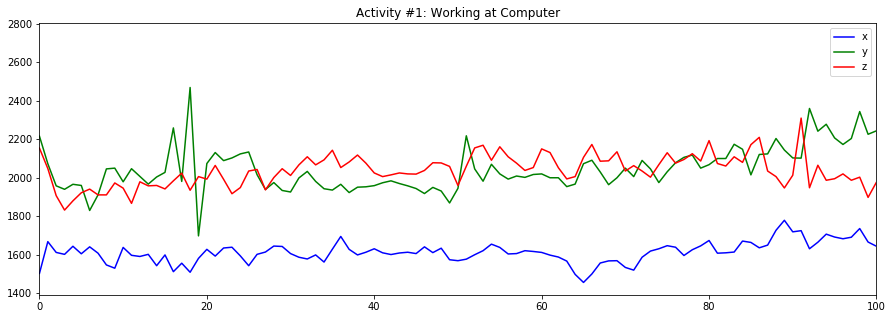

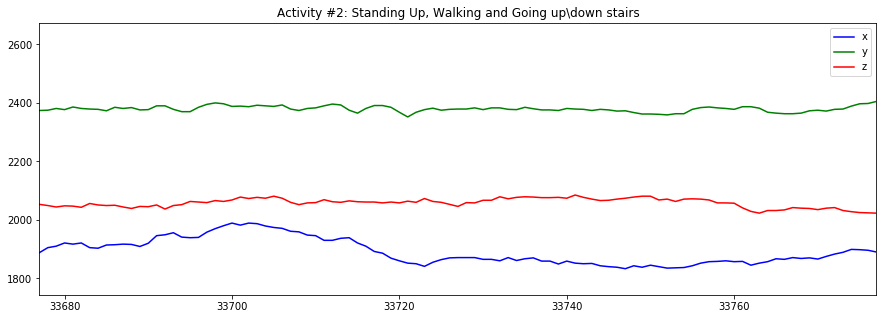

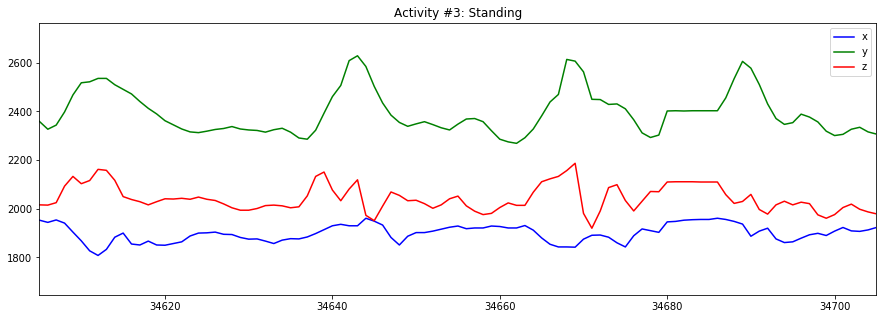

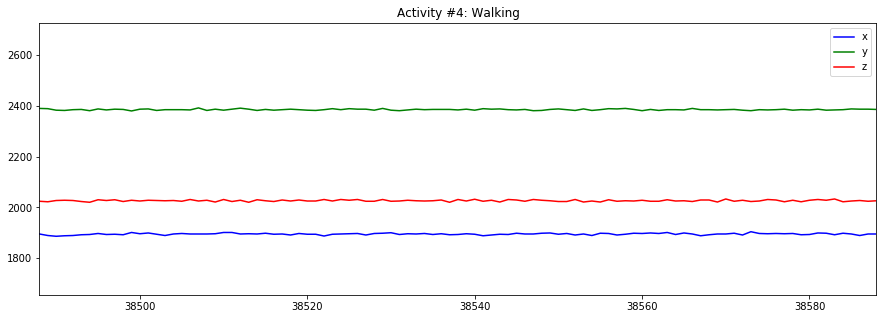

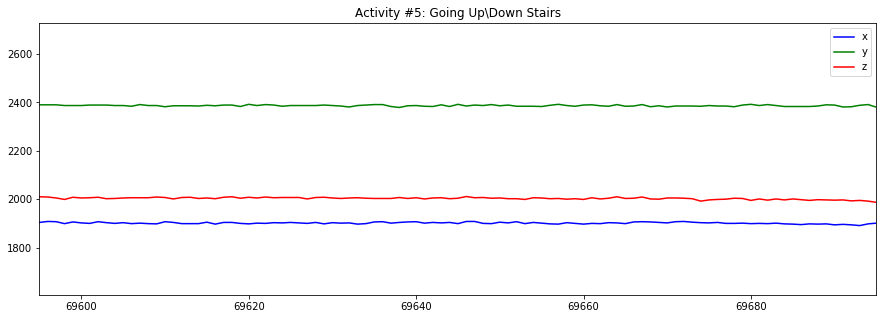

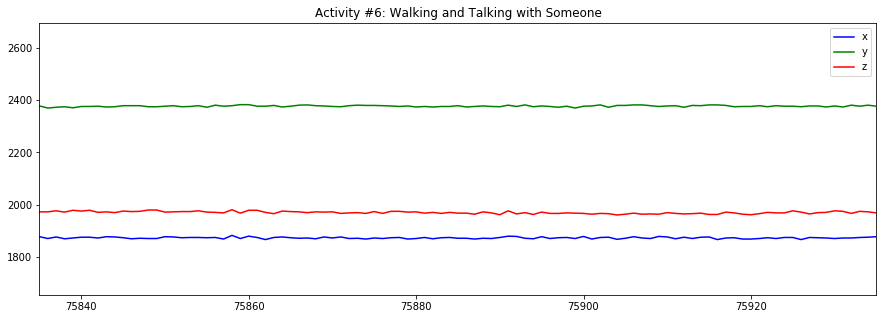

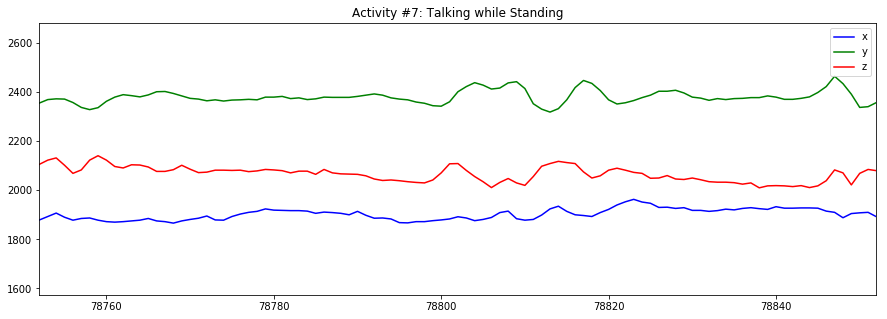

In [8]:
#load the cleaned data
cleaned_data_set = pickle.load(open("clean_data.p", "rb"))

#getting the first file data set
first_data_set = cleaned_data_set['n° 1']

#getting the list of activities
activites = get_activities()

#Defining the size  of the window of visualization
interval_visualization = 100

for activity_num, label in activites.items():
    example_filtered = first_data_set[first_data_set['class'] == activity_num]
    
    #getting the variables x, y, z for each activity
    x = example_filtered.x
    y = example_filtered.y
    z = example_filtered.z
    
    #getting the min and max for each activity in order to define the borns of the axis (x_axis, y_axis)
    index_min, index_max = example_filtered.index.min(), example_filtered.index.max()
    
    #Subplot a figure for each activity
    fig, ax= plt.subplots(figsize=(15,5))
    
    #limiting the x_axis to an interval of 100 starting by the min value (in order to make clear the visualization)
    plt.xlim(index_min, index_min+interval_visualization)
    
    ax.set_title(label='Activity #' + str(activity_num) + ': ' + str(label))
    
    #plot the variables with different colors: x with (b)lue , y: (g)reen, z: (r)ed
    ax.plot(x[0:], "b", label='x')
    ax.plot(y[0:], "g", label='y')
    ax.plot(z[0:], "r", label='z')

    #display the legend 
    ax.legend()


# Preparation of the data sets to fit Tsfresh models


In [9]:
#Some helper function in order to prepare the data sets

#this is the size of sliding window 
sliding_window_size = 100 

#this function break a data frame into small data frames with the size of length observation
def break_df_chunks(df, length):
    return [df[i:i+sliding_window_size] for i in range(0,df.shape[0],length)]


def Preparation(df, id, y, length=None):
    length = length or sliding_window_size
    
    rdf = pd.DataFrame()
    
    for activity_num, label in activites.items():
        
        #filtering data frame by class
        df_class = df[df['class'] == activity_num]
        
        #spliting the data frame into batches of 100 items (the size of the sliding window)
        df_i = break_df_chunks(df_class, length)

        for df_k in df_i:
            # updating the target array with the corresponding class
            y.append(activity_num)
            #Deleting the column class from df
            del df_k['class']
            # Adding new data frame
            df_k['id'] = id
            #Incrementing the data frame
            id += 1 
            #Appending the data frame to list of data frame
            rdf = rdf.append(df_k,ignore_index=True) 
           
    return rdf, id, y

In [10]:
# data frame of small classed data frames
master_df = pd.DataFrame()

#the index of the data frames
id_ = 0

# the target array
y = []

# Preparing and concatenating the data sets in master_df (from 1 --> 15)
for k in range(1,16):
    index = 'n° '+str(k)
    
    data_frame = pd.DataFrame(cleaned_data_set[index])

    df, id_, y = Preparation(data_frame, id_, y)
    
    master_df  = master_df.append(df, ignore_index=True)

/home/fodil/miniconda3/envs/deep-learning/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Storing generated Data

In [3]:
#files names of the stored data
master_df_file_name = "prepared_data_final3.p" 
y_file_name = "target_data_final3.p" 

#store the master_df in prepared_data_final3.p
#pickle.dump(master_df, open(master_df_file_name, "wb"))

#store the y in target_data_final3.p
#pickle.dump(y, open(y_file_name, "wb"))

#in order to load the files we should comment the above dump lines and uncomment the load ones
master_df = pickle.load(open(master_df_file_name, "rb"))
y = pickle.load(open(y_file_name, "rb"))

print(master_df[0:])
print(type(y))

            x     y     z     id
0        1502  2215  2153      0
1        1667  2072  2047      0
2        1611  1957  1906      0
3        1601  1939  1831      0
4        1643  1965  1879      0
5        1604  1959  1921      0
6        1640  1829  1940      0
7        1607  1910  1910      0
8        1546  2045  1910      0
9        1529  2049  1972      0
10       1637  1978  1945      0
11       1596  2046  1866      0
12       1590  2006  1978      0
13       1601  1966  1957      0
14       1542  2003  1959      0
15       1598  2027  1941      0
16       1511  2258  1983      0
17       1555  1980  2023      0
18       1508  2468  1934      0
19       1580  1697  2005      0
20       1627  2073  1992      0
21       1592  2130  2063      0
22       1634  2088  1991      0
23       1638  2102  1916      0
24       1593  2123  1948      0
25       1542  2133  2034      0
26       1601  2015  2042      0
27       1613  1938  1936      0
28       1644  1974  2000      0
29       1

# Preprocessing the data before extraction of features (Optional)

The **<span style="color:red;">RobustScaler</span>** uses a similar method to the **Min-Max scaler** but it instead uses the **interquartile range**,
rathar than the **min-max**, so that it is robust to **outliers**. Therefore it follows the formula:

<span style="color:blue;">RobustScaler</span> = $\frac{x_{i}-Q_{1}(x)}{Q_{3}(x)-Q_{1}(x)}$

In [10]:
from sklearn import preprocessing

#MinMaxScaler
#RobustScaler
#StandardScaler
master_df_preprocessed = pd.DataFrame(master_df)
scaler = preprocessing.MinMaxScaler()
master_df_preprocessed[['x', 'y','z']] = scaler.fit_transform(master_df_preprocessed[['x', 'y','z']])


In [5]:
from tsfresh.feature_extraction import  MinimalFCParameters
#we are going to use the setting MinimalFCParameters in order to extract releavent 8 more important features 
#for each variable (x,y,z) which generate a totale of (8*3=24) feature
settings = MinimalFCParameters()

print(settings)

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'maximum': None, 'minimum': None}


# Extracting features from data

In [11]:
from tsfresh.feature_extraction import extract_features, MinimalFCParameters

features = extract_features(master_df, column_id='id', default_fc_parameters=MinimalFCParameters())
#features_with_preprocessed_data = extract_features(master_df_preprocessed, column_id='id', default_fc_parameters=MinimalFCParameters())

Feature Extraction: 100%|██████████| 10/10 [00:21<00:00,  1.89s/it]


# Storing the generated Features

In [13]:
features_file_name= "features_final3.p"
#features_preprocessed_file_name= "features_preprocessed_final3.p"

#store the features in features_final3.p
#pickle.dump(features, open(features_file_name, "wb"))

#pickle.dump(features_with_preprocessed_data, open(features_preprocessed_file_name, "wb"))

#in order to load features from features_final3.p comment the dump line and uncomment the load one 
features = pickle.load(open(features_file_name , "rb"))
print(features)
#print(features_with_preprocessed_data)

variable  x__length  x__maximum  x__mean  x__median  x__minimum  \
id                                                                
0             100.0      1778.0  1611.64     1609.5      1455.0   
1             100.0      2356.0  1987.64     2052.5      1559.0   
2             100.0      2118.0  1956.87     1965.0      1681.0   
3             100.0      2111.0  1951.76     1956.5      1808.0   
4             100.0      1987.0  1959.43     1961.0      1932.0   
5             100.0      1982.0  1964.44     1965.0      1942.0   
6             100.0      1986.0  1962.01     1961.0      1946.0   
7             100.0      1972.0  1953.86     1954.5      1933.0   
8             100.0      1999.0  1955.71     1953.0      1925.0   
9             100.0      1972.0  1950.00     1952.0      1919.0   
10            100.0      1976.0  1960.91     1961.0      1941.0   
11            100.0      1980.0  1969.02     1969.0      1960.0   
12            100.0      1969.0  1960.77     1960.0      1952.

In [14]:
# Preparation of the target in order to make features selections
file_name = 'target_data_final3.p'

y_array   = pickle.load(open(file_name, "rb"))
        
dy = pd.Series( (v for v in y_array) )

print(dy)

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
19247    7
19248    7
19249    7
19250    7
19251    7
19252    7
19253    7
19254    7
19255    7
19256    7
19257    7
19258    7
19259    7
19260    7
19261    7
19262    7
19263    7
19264    7
19265    7
19266    7
19267    7
19268    7
19269    7
19270    7
19271    7
19272    7
19273    7
19274    7
19275    7
19276    7
Length: 19277, dtype: int64


In [15]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute 
#now we remove all NaN values (that were created by feature calculators,than can not be used on the given data, e.g. because it has too low statistics)
#and we select only the relevant features next:
impute(features)
X_filtered = select_features(features, dy)

#impute(features_with_preprocessed_data)
#X_filtered_preprocessed = select_features(features_with_preprocessed_data, dy)

In [17]:
print(X_filtered)

variable  z__variance  y__variance  y__standard_deviation  \
id                                                          
0           6622.3131   13091.4504             114.417876   
1          21893.4764    5909.3656              76.872398   
2           8470.3379    3534.0291              59.447701   
3           1824.9704     780.4104              27.935826   
4            196.2939      67.4156               8.210700   
5             73.0531      24.7979               4.979749   
6             71.1584      26.5936               5.156898   
7            188.8844      25.6531               5.064889   
8            565.5211     181.9256              13.487980   
9            129.2300      33.8499               5.818067   
10            55.5276      22.0016               4.690586   
11            37.3124      13.3500               3.653765   
12             7.7456       6.9979               2.645354   
13            21.4411      10.5531               3.248554   
14            23.7475   

In [26]:
filtered_features_file_name= "filtered_features_final3.p"

#store the filtered features in filtered_features_final3.p
pickle.dump(X_filtered, open(filtered_features_file_name, "wb"))

In [25]:
print(X_filtered)

variable  z__variance  y__variance  y__standard_deviation  \
id                                                          
0           6622.3131   13091.4504             114.417876   
1          21893.4764    5909.3656              76.872398   
2           8470.3379    3534.0291              59.447701   
3           1824.9704     780.4104              27.935826   
4            196.2939      67.4156               8.210700   
5             73.0531      24.7979               4.979749   
6             71.1584      26.5936               5.156898   
7            188.8844      25.6531               5.064889   
8            565.5211     181.9256              13.487980   
9            129.2300      33.8499               5.818067   
10            55.5276      22.0016               4.690586   
11            37.3124      13.3500               3.653765   
12             7.7456       6.9979               2.645354   
13            21.4411      10.5531               3.248554   
14            23.7475   

# Dimensionality Reduction

- The objective is to find the curse of dimensionality and avoid the overfitting. 

In [40]:
from sklearn.decomposition import PCA

#Before decomposition with Principal component analysis  we scale our data so that each feature has unit variance using StandardScaler:
#the objective is to filter only a subset of the new features, according to how important they are for explaining the data.
scaler = preprocessing.StandardScaler()

X_scaled = scaler.fit_transform(X_filtered)

# keep the first two principal components of the data
pca = PCA(n_components=18)

X_pca = pca.fit_transform(X_scaled)




In [33]:
print(X_pca)

[[ 7.80342420e+00  4.66054705e+00 -6.04809518e+00 ... -4.94353510e-01
   2.08076689e-01 -7.17188112e-01]
 [ 1.69251845e+00  1.12662635e+01 -5.18693659e-01 ...  3.40316039e-01
  -1.47857962e-01  3.83182612e-01]
 [-1.08161126e+00  4.11731250e+00 -2.54014128e+00 ... -3.90962692e-01
  -2.08059609e-01 -4.57861860e-01]
 ...
 [-3.38845964e+00 -1.19504061e+00  1.11876442e+00 ... -4.05246177e-02
  -1.64594174e-02  2.10709293e-02]
 [-3.33370201e+00  1.85656922e-01  1.23389291e+00 ... -6.07073450e-04
   2.56309795e-01 -1.66961109e-01]
 [-2.98120954e+00  3.62728798e-02  8.42806210e-01 ...  1.04060269e-02
   1.37007197e-02 -5.75116793e-02]]


In [41]:
pca_features_file_name = "pca_features_final3.p"
#store the features in pca_features_final3.p
pickle.dump(X_pca, open(pca_features_file_name, "wb"))